In [113]:
%reset -f

In [4]:
import graphviz
import ipywidgets as widgets
from IPython.display import display

In [26]:
class TN:
    def __init__(self, condition="?", name="?", children=[], parent="EMPTY"):
        self.name = name
        self.children = children
        for ch in self.children:
            ch.parent = self
        self.parent = parent
        self.condition = condition
            
    def LeafRender(self):
        f = graphviz.Digraph()
        f.attr(rankdir='TB', size='16')
        f.attr('node', shape='rect')
        leaves = []
        stack = []
        stack.append(self)
        while len(stack) > 0:
            node = stack.pop()
            if len(node.children) == 0:
                leaves.append(node)
            for ch in node.children:
                stack.append(ch)
                f.edge(node.name, ch.name, label=ch.condition)
        leaves_names = [leaf.name for leaf in leaves]
        for leaf in leaves:
            if leaf.parent.name in leaves_names:
                for l in leaves:
                    if l.name == leaf.parent.name:
                        leaves.remove(l)
                        break
        for leaf in leaves:
            f.node(leaf.name, shape="underline")
        display(f)
            
    def Render(self):
        f = graphviz.Digraph()
        f.attr(rankdir='TB', size='16')
        f.attr('node', shape='rect')
        f.node(self.name)
        for node in self.children:
            if len(node.children) == 0:
                f.attr('node', shape='underline')
            f.node(node.condition)
            f.attr('node', shape='rect')
        for node in self.children:
            f.edge(self.name, node.condition, "")
        display(f)
        
    def GetChildByCondition(self, condition):
        ch = "EMPTY"
        for node in self.children:
            if node.condition == condition:
                ch = node
                break
        return ch
    
    def Traverse(self, direction="0"):
        if direction == "0":
            new_node = self.parent
        else:
            new_node = self.GetChildByCondition(direction)
        if new_node == "EMPTY":
            new_node = self
        new_node.Render()
        return new_node
        
    def FindByNodeName(self, name):
        visited = []
        stack = []
        stack.append(self)
        while len(stack) > 0:
            node = stack.pop()
            if node.name == name:
                return node
            if node in visited:
                continue
            visited.append(node)
            for child in node.children:
                stack.append(child)
        return "EMPTY"
    
    def SetParentNode(self, parent):
        self.parent = parent
        return parent

In [39]:
#TN("", "", []),
tree=TN("","Маю організувати виступ", [
    TN("Звук", "Є що підключити", [
        TN("Ні", "Інструмент", []),
        TN("Так", "Є куди підключити", [
            TN("Ні", "Інструмент/пристрій має тип", [
                TN("Фізичний", "Мікрофон", []),
                TN("Аналоговий", "Інструментів багато", [
                    TN("Ні", "Звукова карта", []),
                    TN("Так", "Мікшер", [])]),
                TN("MIDI", "Звукова карта", [])]),
            TN("Так", "Є на чому відтворювати", [
                TN("Ні", "Гучно", [
                    TN("Ні", "Моніторинг себе", [
                        TN("Ні", "Монітори/Комбопідсилок", []),
                        TN("Так", "Навушники", []),]),
                    TN("Так", "Акустична система", [])]),
                TN("Так", "Ну то бринькай собі, я заважаю?", [])])])]),
    TN("Актори", "Інструмент", [
        TN("Ні", "Актор співак", [
            TN("Ні", "Стійки", []),
            TN("Так", "Мікрофон", [])]),
        TN("Так", "Тип", [
            TN("Струнний", "Бринькає", [
                TN("Ні", "Смичковий", []),
                TN("Так", "Акустичний", [])]),
            TN("Ударний", "Гримить", [
                TN("Ні", "Перкусія", []),
                TN("Так", "Барабани", [])]),
            TN("Клавішний", "Гудить", [
                TN("Ні", "Рояль/Піаніно", []),
                TN("Так", "Акордеон/Баян", [])])])]),
    TN("Місце", "Публіка", [
        TN("Мала", "Публіка вулична", [
            TN("Ні", "Стійки", []),
            TN("Так", "На коробку станеш", [
                TN("І ще візьми", "Стійки", [])])]),
        TN("Велика", "Сцена потрібна", [
            TN("Ні", "Стійки", []),
            TN("Так", "Сцена вулична", [
                TN("Ні", "На коробку станеш", []),
                TN("Так", "Ферма, мощення підлоги", [])]),])]),
    TN("Несумісність", "Контактів підключення", [
        TN("Відсутність способу", "Інструмент/пристрій має тип", []),
        TN("Так", "Є обладнання підключити", [
            TN("Ні", "Інструмент/пристрій має тип", []),
            TN("Так", "Перехідник", [])])])])

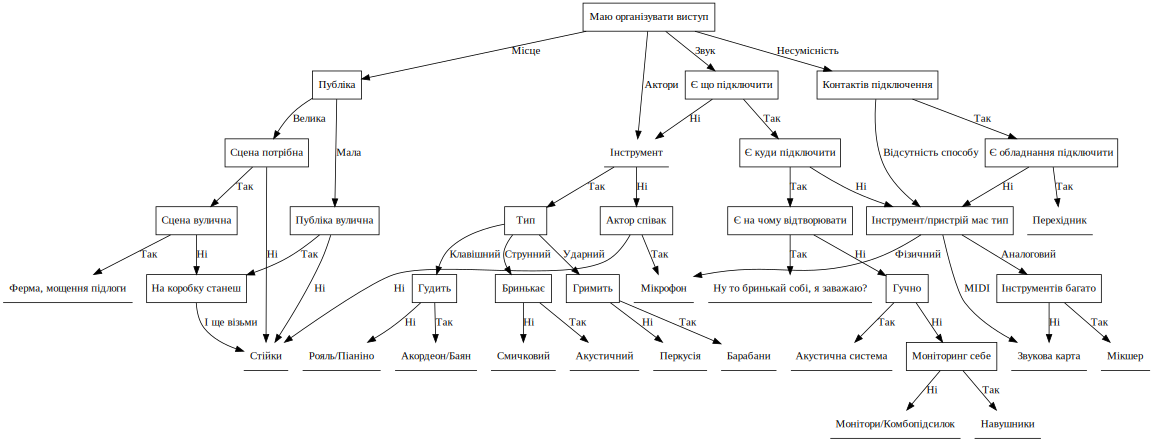

In [38]:
tree.LeafRender()

In [29]:
#btn = widgets.Button(description='Traverse')
#fld = widgets.Text()
#widgets.HBox([fld, btn])
cur_node = tree

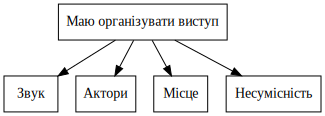

In [36]:
cur_node = cur_node.Traverse("0")